### Exploratory Data analysis for the NJ, PA & NY data

### Question 1. Comparison of the three states

### Question 2. At what weekday do accidents usually occur?

### Question 3. At what time do accidents usually occur on weekdays vs weekends?

### Question 4. At what location do accidents usually occur?

### Question 5. With what weather condition do accidents usually occur?


In [75]:
# Import numpy, pandas, matpltlib.pyplot, sklearn modules and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
plt.style.use('ggplot')

In [5]:
# read the survey results and display the first 5 rows
df = pd.read_csv('./PANJNY_Accidents_May19.csv')
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday,Time_Duration(min)
0,A-194256,MapQuest,201.0,2,2016-11-30 16:37:24,2016-11-30 17:22:05,40.775616,-74.237305,NaN,NaN,0.01,Accident pedestrian involved on County Hwy-659...,540.0,Main St,L,Orange,Essex,NJ,07050-1520,US,US/Eastern,KEWR,2016-11-30 16:51:00,55.0,NaN,93.0,29.79,2.5,ENE,6.9,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Day,Day,Day,2016,Nov,30,16,Wed,45.0
1,A-194257,MapQuest,241.0,3,2016-11-30 16:25:41,2016-11-30 17:10:30,41.139324,-74.169876,NaN,NaN,0.01,Right lane blocked due to accident on I-87 Sou...,NaN,Route 17,R,Sloatsburg,Rockland,NY,10974,US,US/Eastern,KCDW,2016-11-30 16:53:00,53.1,NaN,93.0,29.81,1.0,East,11.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,45.0
2,A-194258,MapQuest,201.0,3,2016-11-30 15:40:06,2016-11-30 17:09:40,41.118748,-74.159744,NaN,NaN,2.53,Accident on I-87 Southbound between Exit 14B C...,NaN,I-287 S,R,Suffern,Rockland,NY,10901,US,US/Eastern,KCDW,2016-11-30 15:53:00,53.1,NaN,93.0,29.83,1.0,ENE,8.1,0.02,Overcast,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,15,Wed,90.0
3,A-194259,MapQuest,201.0,3,2016-11-30 15:26:18,2016-11-30 16:56:02,41.014034,-73.717239,NaN,NaN,1.17,Accident on I-287 Cross Westchester Expy Eastb...,NaN,Hutchinson River Pkwy S,R,White Plains,Westchester,NY,10605,US,US/Eastern,KHPN,2016-11-30 15:56:00,52.0,NaN,93.0,29.81,2.0,East,17.3,0.15,Light Rain,False,False,False,False,True,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,15,Wed,90.0
4,A-194260,MapQuest,201.0,3,2016-11-30 16:14:11,2016-11-30 16:59:00,41.390369,-73.597969,NaN,NaN,0.01,Right hand shoulder blocked due to accident on...,NaN,I-84 E,R,Brewster,Putnam,NY,10509,US,US/Eastern,KDXR,2016-11-30 15:53:00,52.0,NaN,89.0,29.86,3.0,East,10.4,0.05,Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Day,Day,Day,Day,2016,Nov,30,16,Wed,45.0


In [70]:
month_order = [ 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
weekday_order = [ 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
weekday_order_full = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
hour_order= np.arange(24)

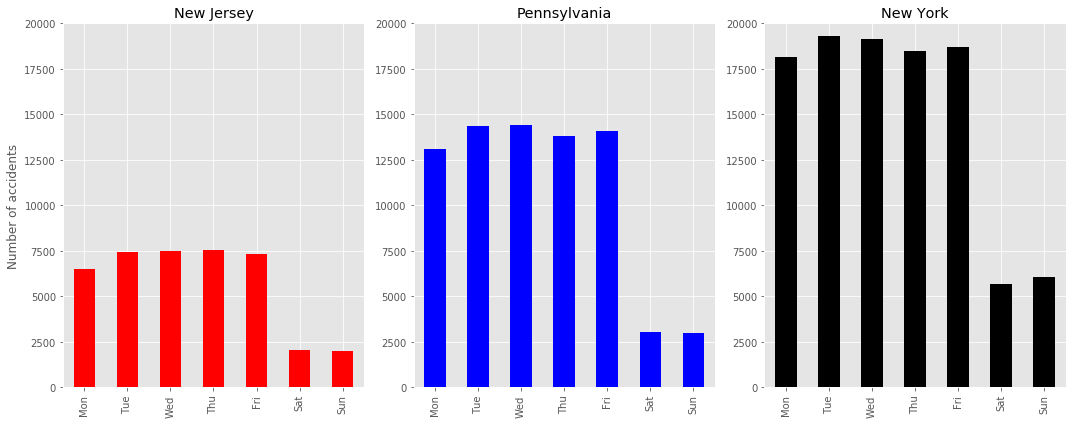

In [92]:

fig= plt.figure(figsize=(15,6))

plt.subplot(1, 3, 1)
df[df['State']=='NJ'].groupby('Start_Weekday').count()['ID'].reindex(weekday_order).plot(kind='bar',color='r').set_title('New Jersey')
plt.xlabel('')
plt.ylim(0, 20000)
plt.ylabel('Number of accidents')

plt.subplot(1, 3, 2)
df[df['State']=='PA'].groupby('Start_Weekday').count()['ID'].reindex(weekday_order).plot(kind='bar',color='b').set_title('Pennsylvania')
plt.xlabel('')
plt.ylim(0, 20000)

plt.subplot(1, 3, 3)
df[df['State']=='NY'].groupby('Start_Weekday').count()['ID'].reindex(weekday_order).plot(kind='bar',color='k').set_title('New York')
plt.xlabel('')
plt.ylim(0, 20000)

plt.tight_layout()
plt.show()

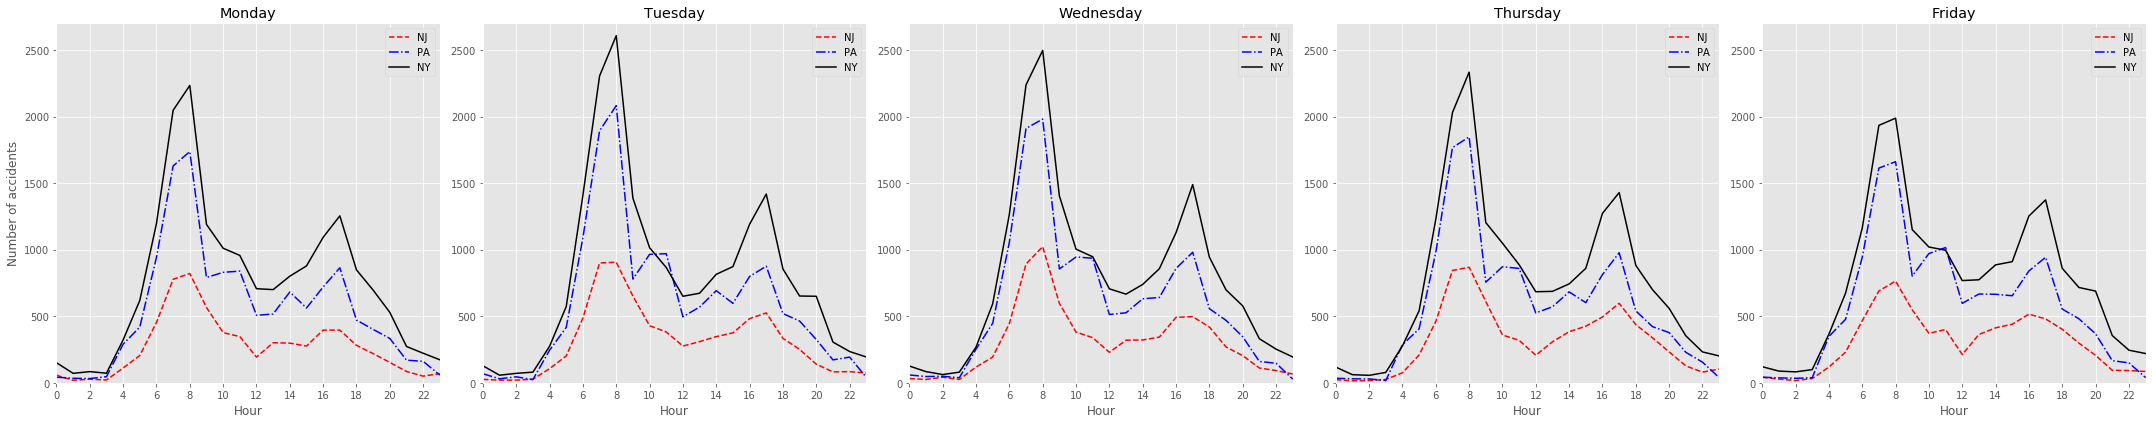

In [74]:
# Hourly distribution of accidents on weekdays in NJ, PA & NY
# Set the size of the figure
fig= plt.figure(figsize=(30,6))
n=5

# Make subplots on each weekday with a for loop
for i in range(n):
    plt.subplot(1, 5, i+1)
    # Plot the state of New Jersey on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NJ') & (df['Start_Weekday']==weekday_order[i])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='PA') & (df['Start_Weekday']==weekday_order[i])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NY') & (df['Start_Weekday']==weekday_order[i])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='solid',color='k')
    
    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.ylim(0, 2700)
    plt.legend(['NJ','PA','NY'])
    plt.title(weekday_order_full[i])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()

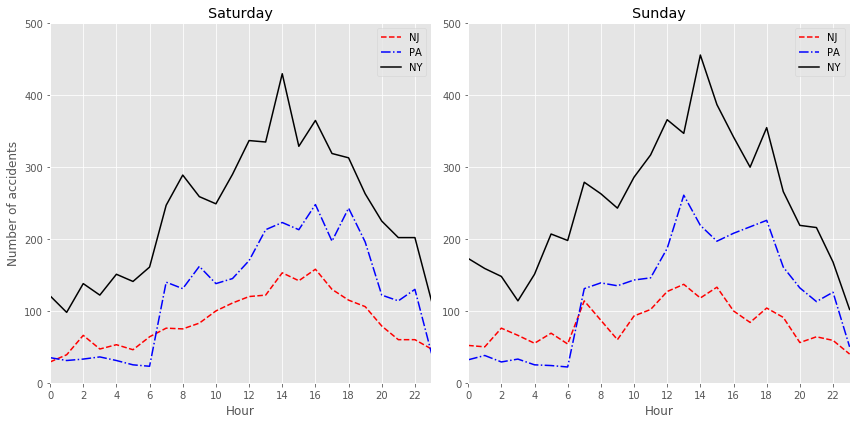

In [81]:
# Hourly distribution of accidents on weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(12,6))

# Make subplots on each weekday with a for loop
for i in range(2):
    # Set the subplot
    plt.subplot(1, 2, i+1)
    # Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NJ') & (df['Start_Weekday']==weekday_order[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashed',color='r')
    # Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='PA') & (df['Start_Weekday']==weekday_order[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashdot',color='b')
    # Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
    df[(df['State']=='NY') & (df['Start_Weekday']==weekday_order[i+5])].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='solid',color='k')

    # Set labels, limit, legend, title and xticks
    plt.xlabel('Hour')
    plt.ylim(0, 500)
    plt.legend(['NJ','PA','NY'])
    plt.title(weekday_order_full[i+5])
    plt.xticks(np.arange(0, 24, step=2))
    
    # Only diplay ylabel on the leftmost plot
    if i==0:
        plt.ylabel('Number of accidents')

plt.tight_layout()
plt.show()


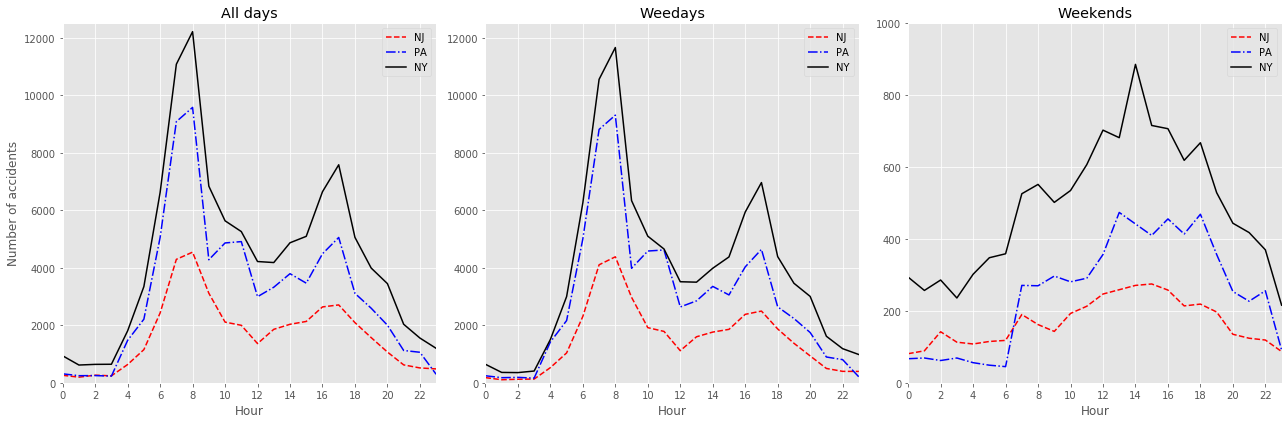

In [89]:
# Hourly distribution of accidents on all days, weekdays, & weekends in NJ, PA & NY
# Set the size of the figure

fig= plt.figure(figsize=(18,6))

# Plot all data together

plt.subplot(1, 3, 1)

# Plot the states of New Jersey, Pennsylvania, & New York on all days, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[df['State']=='NJ'].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashed',color='r')

df[df['State']=='PA'].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashdot',color='b')

df[df['State']=='NY'].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.ylabel('Number of accidents')
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('All days')
plt.xticks(np.arange(0, 24, step=2))

# Weekdays
plt.subplot(1, 3, 2)

# Plot the states of New Jersey, Pennsylvania, & New York on weekdays, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_order[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashed',color='r')

df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_order[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashdot',color='b')

df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_order[:5]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 12500)
plt.legend(['NJ','PA','NY'])
plt.title('Weedays')
plt.xticks(np.arange(0, 24, step=2))

# Weekends
plt.subplot(1, 3, 3)

# Plot the state of New Jersey on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NJ') & (df['Start_Weekday'].isin(weekday_order[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashed',color='r')
# Plot the state of Pennsylvania on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='PA') & (df['Start_Weekday'].isin(weekday_order[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='dashdot',color='b')
# Plot the state of New York on weekends, group the data by hours and count the number of accident, reorder the data by hours, make lineplot with certain style and color
df[(df['State']=='NY') & (df['Start_Weekday'].isin(weekday_order[5:]))].groupby('Start_Hour').count()['ID'].reindex(hour_order).plot(linestyle='solid',color='k')

# Set labels, limit, legend, title and xticks
plt.xlabel('Hour')
plt.ylim(0, 1000)
plt.legend(['NJ','PA','NY'])
plt.title('Weekends')
plt.xticks(np.arange(0, 24, step=2))

plt.tight_layout()
plt.show()